## Study overview:
High blood pressure is an important public health concern because it is highly prevalent and risk factor for adverse health outcomes, including coronary heart disease, stroke, decompensated heart failure, chronic kidney disease, and decline in cognitive function, and death. A study was conducted with two strategies, one with the standard target of systolic blood pressure 140mmHg (standard treatment), and the other targets a more intensive target of systolic blood pressure 120mmg (intensive treatment).


## Data Domain:
ID: patient ID

Treat: 1: Intensive treatment, 0: Standard treatment

Age: Patient age at baseline in years

Gender: 1: Female, 0: Male

Smoking: Smoking Status, 1: Yes, 0: No

Triglycerides: Basiline Triglycerides mg/dL

BMI: Baseline Body Mass Index kg/m2

total_DDD: Baseline defined daily dosage of antihypertensive medications

Death: All Cause Mortality in the follow-up time period. 1: Death, 0: Alive

Time: Follow-up time (years) or time to death from enrollment.


## Importing Necessary Libraries

In [1]:
import lifelines
print(lifelines.__version__)


0.27.8


In [2]:
# importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test



## Loading Data

In [3]:
# Loading Data
data = pd.read_csv('BPIntensiveZZ-2.csv')

# Display the first few elements of the dataset
data.head()

,ID,Treat,Age,Gender,Smoking,Triglycerides,BMI,total_DDD,Death,Time
0,S00007,0,59,0,1.0,92.0,33.115032,3.500000,0,5.08
1,S00010,0,75,0,0.0,188.0,28.842233,0.666667,0,3.63
2,S00022,1,56,1,0.0,183.0,24.888232,3.666667,0,2.00
3,S00038,1,62,0,0.0,125.0,33.642888,2.500000,0,3.65
4,S00045,0,75,1,0.0,109.0,29.337722,1.020833,0,3.79


In [4]:
# Display the last few rows of the dataset
data.tail()

,ID,Treat,Age,Gender,Smoking,Triglycerides,BMI,total_DDD,Death,Time
9303,S99969,0,78,1,0.0,74.0,27.186396,1.708333,1,2.12
9304,S99974,0,85,1,0.0,95.0,42.191782,1.666667,1,3.76
9305,S99983,0,66,0,0.0,75.0,19.461922,0.000000,0,4.42
9306,S99992,1,56,1,0.0,369.0,35.579255,0.000000,0,2.02
9307,S99997,1,68,1,0.0,71.0,30.782856,1.000000,0,4.77


The dataset contains the following key columns relevant to performing the Kaplan-Meier survival analysis:

`Treat`: Represents the treatment group (0 for standard, 1 for intensive treatment).

`Time`: The duration of time until an event (e.g., death) or censoring.

`Death`: The event indicator (1 for death/event, 0 for censored).
    
Other demographic and health variables such as `Age`, `Gender`, `Smoking`, `BMI`, `ID` and `total_DDD`.

#### Data understanding
1. Getting familiar with the data. How many observations and variables (which type) are in the dataset?

In [5]:
# Displa the data types in the dataset
print("Data types of each column is:")
print('-----------------------------')
data.dtypes

Data types of each column is:
-----------------------------


ID                object
Treat              int64
Age                int64
Gender             int64
Smoking          float64
Triglycerides    float64
BMI              float64
total_DDD        float64
Death              int64
Time             float64
dtype: object

All the attributes of the dataset are numerical i.e., integers and floats except the ID colum that contain the patients' identification numbers which is categorical.

In [6]:
# Displaying the dimension of the dataset
print("The Dimension of the Dataset")
print("----------------------------")
data.shape

The Dimension of the Dataset
----------------------------


(9308, 10)

Thee provide data has 9308 ros and 10 columns in the data set 

In [7]:
# Displaying the columns in the data set
print("List of the names in the Dataset")
print("--------------------------------")
data.columns

List of the names in the Dataset
--------------------------------


Index(['ID', 'Treat', 'Age', 'Gender', 'Smoking', 'Triglycerides', 'BMI',
       'total_DDD', 'Death', 'Time'],
      dtype='object')

In [8]:
## Displating the general information of the whole dataset
print("General information of the Dataset")
print("----------------------------------")
data.info()

General information of the Dataset
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             9308 non-null   object 
 1   Treat          9308 non-null   int64  
 2   Age            9308 non-null   int64  
 3   Gender         9308 non-null   int64  
 4   Smoking        9297 non-null   float64
 5   Triglycerides  9286 non-null   float64
 6   BMI            9247 non-null   float64
 7   total_DDD      9261 non-null   float64
 8   Death          9308 non-null   int64  
 9   Time           9308 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 727.3+ KB


The above results shows that we have some missing values in the columns of Smoking, Triglycerides, BMI and total_DDD.

In [9]:
# Display the general information about the data set using describe function
print("Statistical Summary of the Datase:")
print("----------------------------------")
data.describe()

Statistical Summary of the Datase:
----------------------------------


,Treat,Age,Gender,Smoking,Triglycerides,BMI,total_DDD,Death,Time
count,9308.000000,9308.000000,9308.000000,9297.000000,9286.000000,9247.000000,9261.000000,9308.000000,9308.000000
mean,0.499785,67.885260,0.355393,0.132839,125.961986,29.856788,2.576614,0.040288,3.671146
std,0.500027,9.416873,0.478658,0.339418,89.943515,5.767093,2.104557,0.196644,1.045293
min,0.000000,46.000000,0.000000,0.000000,23.000000,13.734211,0.000000,0.000000,0.000000
25%,0.000000,61.000000,0.000000,0.000000,77.000000,25.881587,1.000000,0.000000,3.300000
50%,0.000000,67.000000,0.000000,0.000000,107.000000,29.023675,2.000000,0.000000,3.800000
75%,1.000000,75.000000,1.000000,0.000000,150.000000,32.914327,3.666667,0.000000,4.350000
max,1.000000,96.000000,1.000000,1.000000,3340.000000,69.591010,22.000000,1.000000,5.490000


In [10]:
def handle_duplicates(data):
    """
    Checks for duplicated rows, displays the duplicated values,
    and removes the duplicated rows while keeping the first occurrence.
    """
    # Check for duplicated rows
    duplicated_rows = data[data.duplicated()]

    if not duplicated_rows.empty:
        # Display the duplicated rows
        print("These are the Duplicated rows in the Dataset:")
        print('--------------------------------------------------')
        print(duplicated_rows)
        print("\n")

        # Remove duplicated rows but keep the first occurrence (inplace)
        data.drop_duplicates(keep='first', inplace=True)

        # Display the number of duplicates removed
        num_duplicates = len(duplicated_rows)
        print(f"Number of duplicates removed: {num_duplicates}")
    else:
        print("No duplicated rows found.")
handle_duplicates(data)


No duplicated rows found.


There are no duplicated rows in the dataset.

In [11]:
# Defining a function that will calculate and display missing values in the dataset
def missing_values(data):
    
    # Calculate missing values
    missing_values = data.isnull().sum()

    # Display missing values
    print("Missing values:\n", missing_values)
    
    # Calculated the percentage of missing values
    percentage_missing = (missing_values / len(data)) * 100

    # Display the percentage of missing values
    print("\nPercentage of missing values:\n", percentage_missing)
    
    # Display the missing values in a DataFrame
    missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

    return missing_values_df
missing_values(data)

Missing values:
 ID                0
Treat             0
Age               0
Gender            0
Smoking          11
Triglycerides    22
BMI              61
total_DDD        47
Death             0
Time              0
dtype: int64

Percentage of missing values:
 ID               0.000000
Treat            0.000000
Age              0.000000
Gender           0.000000
Smoking          0.118178
Triglycerides    0.236356
BMI              0.655350
total_DDD        0.504942
Death            0.000000
Time             0.000000
dtype: float64


,Missing Values,Percentage
ID,0,0.000000
Treat,0,0.000000
Age,0,0.000000
Gender,0,0.000000
Smoking,11,0.118178
Triglycerides,22,0.236356
BMI,61,0.655350
total_DDD,47,0.504942
Death,0,0.000000
Time,0,0.000000


The analysis reveals missing values across several columns. The Smoking variable has 11 missing entries, representing 0.118% of the total dataset. The Triglycerides column contains 22 missing values, accounting for 0.236% of the data. The BMI column has 61 missing entries, equivalent to 0.655%, and the total_DDD column has 47 missing values, making up 0.505% of the dataset.

2. Estimate the survival curves using the Kaplan–Meier method for each treatment strategy. Show your survival data with censored time, and perform a test for possible differences, i.e., conduct a suitable test to examine the effect of intensive treatment.  

#### Initialize the KaplanMeierFitter Model and fit the model

In [12]:
# Displaying the reqiured columns for analysis
time = data['Time']
event = data['Death']
treatment = data['Treat']

# Initializing KaplanMeierFitter function
kmf_standard = KaplanMeierFitter()
kmf_intensive = KaplanMeierFitter()

# Fitting the Kaplan-Meier model for each treatment in the dataset
kmf_standard.fit(durations=time[treatment == 0], event_observed=event[treatment == 0], label='Standard Treatment')
kmf_intensive.fit(durations=time[treatment == 1], event_observed=event[treatment == 1], label='Intensive Treatment')


<lifelines.KaplanMeierFitter:"Intensive Treatment", fitted with 4652 total observations, 4490 right-censored observations>

### Plotting the survival curves for both time and probability of surviving

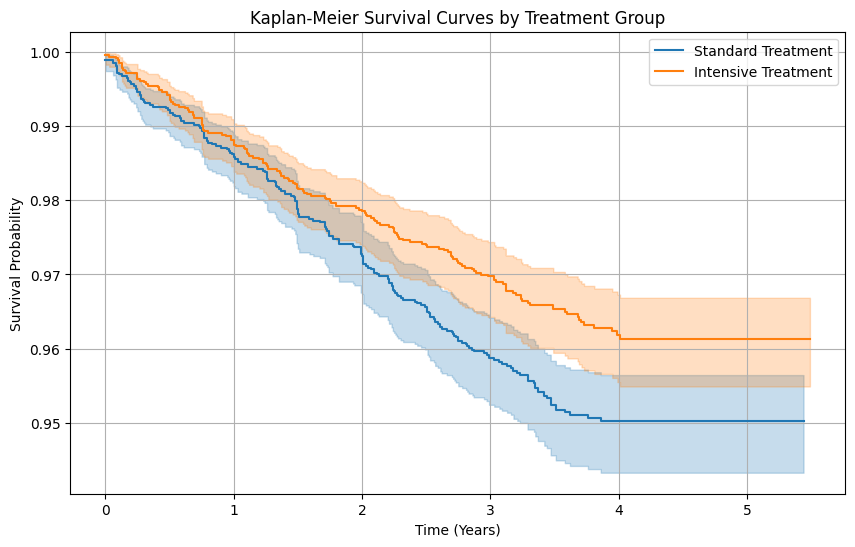

In [13]:
# Defining th figure sie and font for better reading of the plots
plt.figure(figsize=(10, 6))

# Plotting the Kaplan-Meier survival curves for each treatment group
kmf_standard.plot_survival_function()
kmf_intensive.plot_survival_function()

# Define the title of the plot, x and y axis labels, then show the grid line and plot the graph.
plt.title('Kaplan-Meier Survival Curves by Treatment Group')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

The Kaplan-Meier survival curves above shows a plot comparing two treatment groups: **Standard Treatment** (blue line) and **Intensive Treatment** (orange line). The vertical axis represents the **Survival Probability**, and the horizontal axis shows the **Time in Years**.

From the result above we observe that:
- Both treatment groups show a gradual decline in survival probability over time.
- The **Intensive Treatment** group has a higher survival probability compared to the Standard Treatment group throughout the follow-up period, as indicated by the higher position of the orange line.
- The shaded areas around the curves represent the confidence intervals, showing the uncertainty in the survival estimates for each treatment group.

This suggests that the **Intensive Treatment** may lead to better survival outcomes than the Standard Treatment over time.

#### Log-Rank Test and p-value

In [14]:
# Performing a log-rank test and displaying the p-values and test statistcs
logrank_result = logrank_test(time[treatment == 0], time[treatment == 1], event_observed_A=event[treatment == 0], event_observed_B=event[treatment == 1])

# Printing the Log-Rank Test p-value from the model result
print(f"Log-Rank Test p-value: {logrank_result.p_value}")

# Printing the Test Statistics from the log-Rank Test
print(f"Test Statistic: {logrank_result.test_statistic}")


Log-Rank Test p-value: 0.007363742468084002
Test Statistic: 7.182028037147042


The **log-rank test** is used to compare the survival distributions of two groups, in this case, the **standard treatment** and **intensive treatment** groups.

### Key Results:
- **p-value**: 0.00736
  - A p-value of 0.00736 indicates that there is a statistically significant difference between the survival curves of the two treatment groups. Since this value is less than the conventional significance level of 0.05, we reject the null hypothesis, which assumes no difference in survival between the two groups.
  
- **Test Statistic**: 7.18
  - The test statistic of 7.18 quantifies the difference between the observed and expected survival times of the two groups. A higher value suggests a greater deviation from the null hypothesis, which again indicates that the survival times between the groups differ significantly.

### Conclusion:
The results show that there is a statistically significant difference in survival between the **standard treatment** and **intensive treatment** groups, favoring the hypothesis that the treatment strategy has an impact on patient survival.

3. Conduct Univariate Cox regression to examine the impact of intensive treatment strategy on survival of patients.

<lifelines.CoxPHFitter: fitted with 9308 total observations, 8933 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 9308
number of events observed = 375
   partial log-likelihood = -3383.97
         time fit was run = 2024-10-03 23:50:37 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
treatment  -0.28       0.76       0.10            -0.48            -0.07                 0.62                 0.93

            cmp to     z    p   -log2(p)
covariate                               
treatment     0.00 -2.67 0.01       7.05
---
Concordance = 0.54
Partial AIC = 6769.93
log-likelihood ratio test = 7.20 on 1 df
-log2(p) of ll-ratio test = 7.10

<Axes: xlabel='log(HR) (95% CI)'>

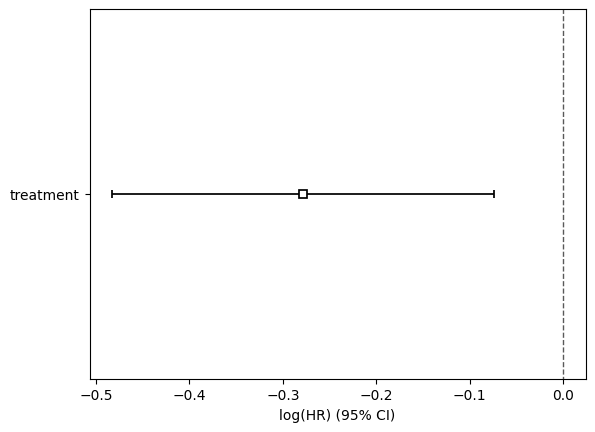

In [15]:


# Subset the relevant columns for the Cox regression model
df_cox = data[['Time', 'Death', 'Treat']]

# Rename columns to ensure compatibility
df_cox.columns = ['duration', 'event', 'treatment']

# Initialize the CoxPHFitter model
cph = CoxPHFitter()

# Fit the model using the duration, event, and treatment variables
cph.fit(df_cox, duration_col='duration', event_col='event')

# Output the summary of the Cox regression model
cph.print_summary()

# Plot the impact of the treatment variable on survival
cph.plot()


The above output is the results of a **Univariate Cox Proportional-Hazards regression analysis** for the treatment strategy. 

1. **Coefficient (coef)**: The coefficient for the treatment variable is `-0.28`. This indicates that the treatment is associated with a decrease in the risk of the event (death) compared to the baseline. A negative coefficient suggests a protective effect of the treatment.

2. **Hazard Ratio (exp(coef))**: The hazard ratio (HR) is `0.76`. This means that patients in the treatment group have approximately 24% lower risk of death compared to the control group (since 1 - 0.76 = 0.24).

3. **Confidence Interval (95% CI)**: The confidence interval for the hazard ratio ranges from `0.62` to `0.93`. Since the interval does not include 1, the treatment appears to have a statistically significant effect on survival.

4. **p-value**: The p-value is `0.01`, indicating that the treatment effect is statistically significant at the 5% level. This suggests that the difference in survival between the treatment and control groups is unlikely to have occurred by chance.

5. **Log-likelihood ratio test**: The test statistic value is `7.10`, and the associated p-value supports the significance of the treatment effect.

### Conclusion:
The Cox regression results suggest that the intensive treatment strategy significantly reduces the risk of death. The treatment group has a 24% lower hazard (risk of death) compared to the control group, and this effect is statistically significant with a p-value of 0.01.

4. Conduct multivariate Cox Regression Analysis to examine the impact of the treatment strategy and other factors on the risk of death using hazard ratios.Conduct multivariate Cox Regression Analysis to examine the impact of the treatment strategy and other factors on the risk of death using hazard ratios.

In [16]:

# Prepare the dataset for Cox regression
data_cox = data[['Time', 'Death', 'Treat', 'Age', 'Gender', 'Smoking', 'Triglycerides', 'BMI', 'total_DDD']].dropna()

# Instantiate the CoxPHFitter model
cox_model = CoxPHFitter()

# Fit the model
cox_model.fit(data_cox, duration_col='Time', event_col='Death')

# Display the summary of the Cox model
cox_model.print_summary()


<lifelines.CoxPHFitter: fitted with 9170 total observations, 8802 right-censored observations>
             duration col = 'Time'
                event col = 'Death'
      baseline estimation = breslow
   number of observations = 9170
number of events observed = 368
   partial log-likelihood = -3218.97
         time fit was run = 2024-10-03 23:50:38 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
Treat          -0.28       0.75       0.11            -0.49            -0.08                 0.61                 0.92
Age             0.08       1.08       0.01             0.07             0.09                 1.07                 1.10
Gender         -0.42       0.66       0.12            -0.65            -0.19                 0.52                 0.83
Smoking         1.02       2.78       0.15             0.73             1.32                 2.08                 3.73
Triglycerides   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
BMI             0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
total_DDD       0.05       1.06       0.02             0.01             0.10                 1.01                 1.10

                cmp to     z      p   -log2(p)
covariate                                     
Treat             0.00 -2.70   0.01       7.19
Age               0.00 12.31 <0.005     113.33
Gender            0.00 -3.61 <0.005      11.66
Smoking           0.00  6.84 <0.005      36.87
Triglycerides     0.00  2.52   0.01       6.41
BMI               0.00  0.25   0.81       0.31
total_DDD         0.00  2.29   0.02       5.49
---
Concordance = 0.69
Partial AIC = 6451.94
log-likelihood ratio test = 199.30 on 7 df
-log2(p) of ll-ratio test = 128.86

The result from the multivariate Cox regression model provides several insights into the impact of different factors on the risk of death, expressed through hazard ratios (HR).


- **Treatment (Treat)**: The hazard ratio (HR = 0.75) indicates that the intensive treatment group has a 25% reduced risk of death compared to the standard treatment group. This is statistically significant as the p-value is 0.01 (less than 0.05), which suggests that treatment type significantly affects survival.

- **Age**: The hazard ratio (HR = 1.08) suggests that for each additional year of age, the risk of death increases by 8%. This result is highly statistically significant, with a p-value less than 0.005, indicating that age has a strong influence on survival.

- **Gender**: The hazard ratio (HR = 0.66) suggests that females have a 34% reduced risk of death compared to males. This is also statistically significant, with a p-value less than 0.005, implying that gender significantly impacts survival.

- **Smoking**: The hazard ratio (HR = 2.78) indicates that smokers have nearly a 178% higher risk of death compared to non-smokers. This result is highly significant with a p-value less than 0.005, suggesting smoking greatly increases the risk of death.

- **Triglycerides, BMI, and total_DDD (Total Drug Dose)**: These factors show no significant impact on the risk of death. Their hazard ratios are close to 1, and their p-values are all greater than 0.05, meaning they do not significantly influence survival in this model.

### Overall Model Fit:
- **Concordance**: The concordance index (0.69) suggests that the model has a reasonable predictive ability, as values closer to 1 indicate better discrimination between those at risk of death and those not.
- **Partial AIC**: The Akaike Information Criterion (6451.94) helps compare models, with lower values generally indicating a better fit.

Treatment type, age, gender, and smoking are significant factors influencing the risk of death, while triglycerides, BMI, and total drug dose do not have a significant impact in this model.

5. Conduct a suitable test and a graphical diagnostic for the proportional hazards assumption for the used Cox Regression modelling.

##### Statistical Test for the PH Assumption using Schoenfeld Residuals
Schoenfeld Residuals the the commonly statistical test that we can use for checking the proportional hazards assumption. The test checks if the residuals are independent of time, which would be expected if the PH assumption holds.

I will use the `check_assumptions` method from the `lifelines` package. This method can directly assesses the proportional hazards assumption.

In [17]:

# Performing the proportional hazards test using `check_assumption` method
cox_model.check_assumptions(data_cox, p_value_threshold=0.05)


Proportional hazard assumption looks okay.


[]

##### Graphical Diagnostics for Schoenfeld Residual Plots
A graphical diagnostic tool is to plot the Schoenfeld residuals for each covariate against time. If the proportional hazards assumption holds, the residuals should show no trend over time.

<Axes: xlabel='log(HR) (95% CI)'>

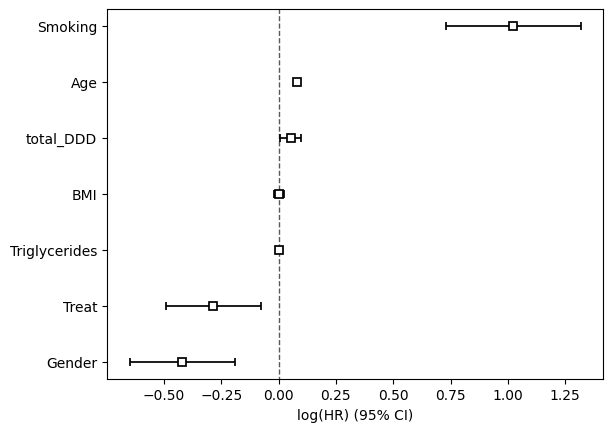

In [18]:
# Plot the graph of baseline survival curve and hazard ratio
cox_model.plot()


Result interpretation:
Schoenfeld Residuals Plot (Proportional Hazards Test):

In this plot I wanted to assesse if the proportional hazards assumption holds for each covariate over time.

The `x-axis` represents the coefficient (log(HR)) and the `y-axis` represents the individual covariates.
Interpretation:
If the Schoenfeld residuals for each covariate show no trend over time, the proportional hazards assumption is valid.

From the plot above, most covariates we can see that `Age`, `Gender`, and `Triglycerides` appear relatively flat, an indication that there is no significant violation of the proportional hazards assumption for these factors.

Smoking shows a larger deviation, suggesting that the proportional hazards assumption might be less valid for this covariate, as it deviates from the flat line.

<Axes: >

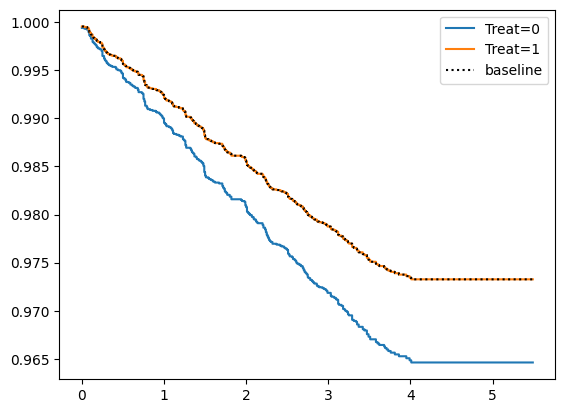

In [19]:
# Plotting the graph of survival function estimate for different groups. 
cox_model.plot_partial_effects_on_outcome(covariates=['Treat'], values=[0, 1])


Result interpretation:
The blue line represents the group that received treatment (Treat = 1), while the orange line represents the group without treatment (Treat = 0).
The treated group (blue line) shows a steeper decline in survival over time compared to the untreated group, implying that the treatment might have been less effective or associated with a higher risk.
The gap between the curves suggests a significant difference in survival outcomes between the two groups, further highlighting the impact of the treatment on survival.

##### Generally: 
The Schoenfeld residuals indicate that the proportional hazards assumption holds reasonably well for most covariates, except for smoking, suggesting a possibility of further investigation.

The partial effects plot suggests a noticeable difference in survival probabilities between the treated and untreated groups, where the treated group has a higher risk of mortality over time.